In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
predictions = pd.read_excel("./intermediate_data/proof_of_concept_predictions.xlsx", sheet_name='confusion_matrix', engine='openpyxl')

In [3]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id_inv  23 non-null     object 
 1   xrd1    23 non-null     object 
 2   xrd2    3 non-null      object 
 3   xrd3    0 non-null      float64
 4   true_y  23 non-null     object 
 5   pred_y  23 non-null     object 
 6   acc     23 non-null     int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 1.4+ KB


In [4]:
predictions = predictions.drop_duplicates(subset=['id_inv'], keep='first')
predictions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 22
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id_inv  23 non-null     object 
 1   xrd1    23 non-null     object 
 2   xrd2    3 non-null      object 
 3   xrd3    0 non-null      float64
 4   true_y  23 non-null     object 
 5   pred_y  23 non-null     object 
 6   acc     23 non-null     int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 1.4+ KB


In [5]:
predictions_filtered = predictions[['id_inv', 'true_y', 'pred_y']]

predictions_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 22
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id_inv  23 non-null     object
 1   true_y  23 non-null     object
 2   pred_y  23 non-null     object
dtypes: object(3)
memory usage: 736.0+ bytes


In [6]:
y_true = predictions_filtered['true_y']
y_pred = predictions_filtered['pred_y']
etiquetas_true = y_true.unique().tolist() #
etiquetas_pred = y_pred.unique().tolist()

y_pred.nunique()

5

In [7]:
#y_true.nunique()
#y_pred.nunique()
etiquetas_pred
#etiquetas_true 
etiquetas = etiquetas_pred + etiquetas_true
etiquetas

['Clinochlore',
 'Muscovite',
 'Chlorite-serpentine',
 'Talc',
 'Variscite',
 'Clinochlore',
 'Muscovite',
 'Talc']

In [8]:
# Combinar las dos series en una sola serie
etiquetas_combinadas = pd.concat([y_true, y_pred], ignore_index=True)

# Obtener los elementos únicos de la serie combinada
etiquetas_unicas = np.unique(etiquetas_combinadas)

# Crear una nueva serie con los elementos únicos
unique_series = pd.Series(etiquetas_unicas)

# Mostrar los resultados
unique_series.nunique()

5

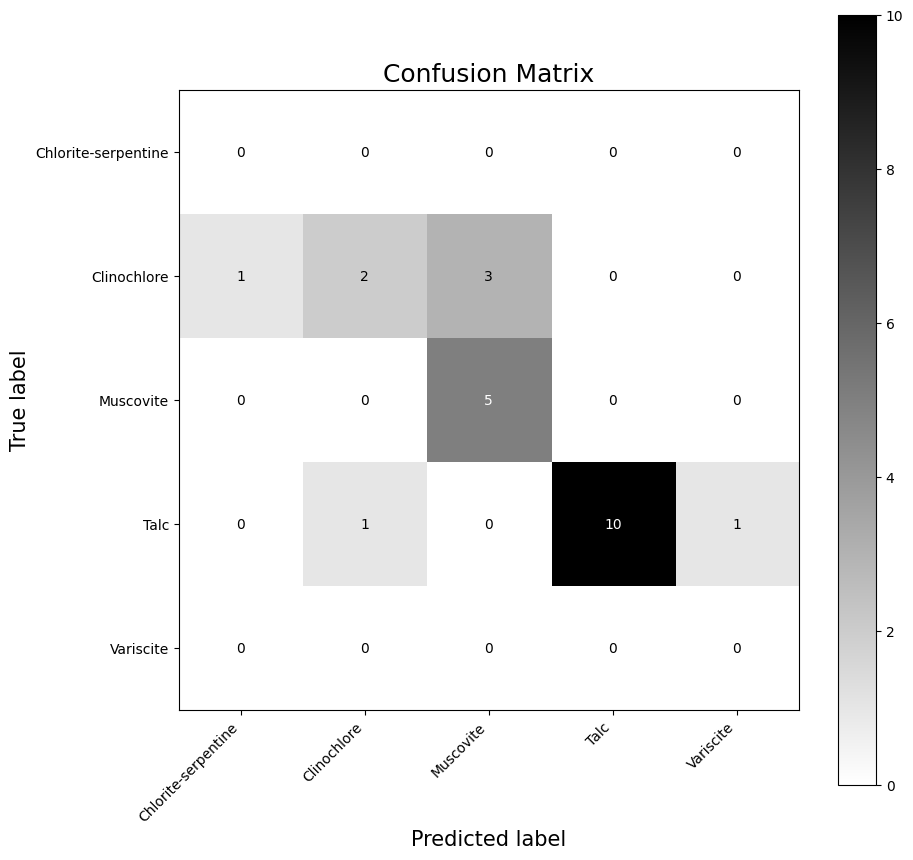

In [9]:

cm = confusion_matrix(y_true, y_pred, labels=unique_series)
cm_display = ConfusionMatrixDisplay(cm, display_labels=unique_series)
fig, ax = plt.subplots(figsize=(10, 10))
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('Etiqueta predicha', fontsize=15)
plt.ylabel('Etiqueta verdadera', fontsize=15)
cm_display.plot(ax=ax,cmap='binary')
cm_display.ax_.set_xticklabels(unique_series, rotation=45, ha='right', fontdict={'fontsize': 10})
cm_display.ax_.set_yticklabels(unique_series, fontdict={'fontsize': 10})

plt.savefig('./FIGURES/matriz_confusion_400dpi.png',dpi=400, bbox_inches='tight')
plt.show()

In [13]:
from sklearn.metrics import classification_report

class_rep = pd.DataFrame(classification_report(y_true, y_pred, output_dict=True)).T
class_rep
#class_rep.to_csv('./TABLES/proof_of_concept_class_report.csv')


/home/dsg/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dsg/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dsg/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
Chlorite-serpentine,0.000000,0.000000,0.000000,0.00000
Clinochlore,0.666667,0.333333,0.444444,6.00000
Muscovite,0.625000,1.000000,0.769231,5.00000
Talc,1.000000,0.833333,0.909091,12.00000
Variscite,0.000000,0.000000,0.000000,0.00000
accuracy,0.739130,0.739130,0.739130,0.73913
macro avg,0.458333,0.433333,0.424553,23.00000
weighted avg,0.831522,0.739130,0.757474,23.00000
